## HUMAN ACTIVITY RECOGNITION USING SMARTPHONES

Human activity recognition, or HAR for short, is a broad field of study concerned with identifying the specific movement or action of a person based on sensor data.

Movements are often typical activities performed indoors, such as walking, talking, standing, and sitting. They may also be more focused activities such as those types of activities performed in a kitchen or on a factory floor.

The sensor data is recorded directly on the subject such as by smart phones that have accelerometers and gyroscopes.

The activities are as follows:

Walking, 
Walking_upstairs, 
Walking_downstairs, 
Standing, 
Sitting, 
Laying

**Accelerometer**:
            An accelerometer is an electromechanical device used to measure acceleration forces. Such forces may be static, like the continuous force of gravity or, as is the case with many mobile devices, dynamic to sense movement or vibrations.bold text


**Gyroscope**:
         is a device used for measuring or maintaining orientation and angular velocity.

In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#import the train dataset
train_data=pd.read_csv("/content/train.csv")

In [155]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

In [156]:
train_data.shape

(7352, 563)

In [157]:
#Check the null values 
train_data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [158]:
train_data.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [0]:
#importing the test data set
test_data=pd.read_csv("/content/test.csv")

In [160]:
test_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,...,-0.484619,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,...,-0.723642,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,...,-0.898000,-1.000000,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.997663,-0.975209,-0.999504,-0.9682

In [161]:
test_data.shape

(2947, 563)

In [162]:
#Checking the null values
test_data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [163]:
test_data.Activity.value_counts()

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64

## Visualizing the train dataset

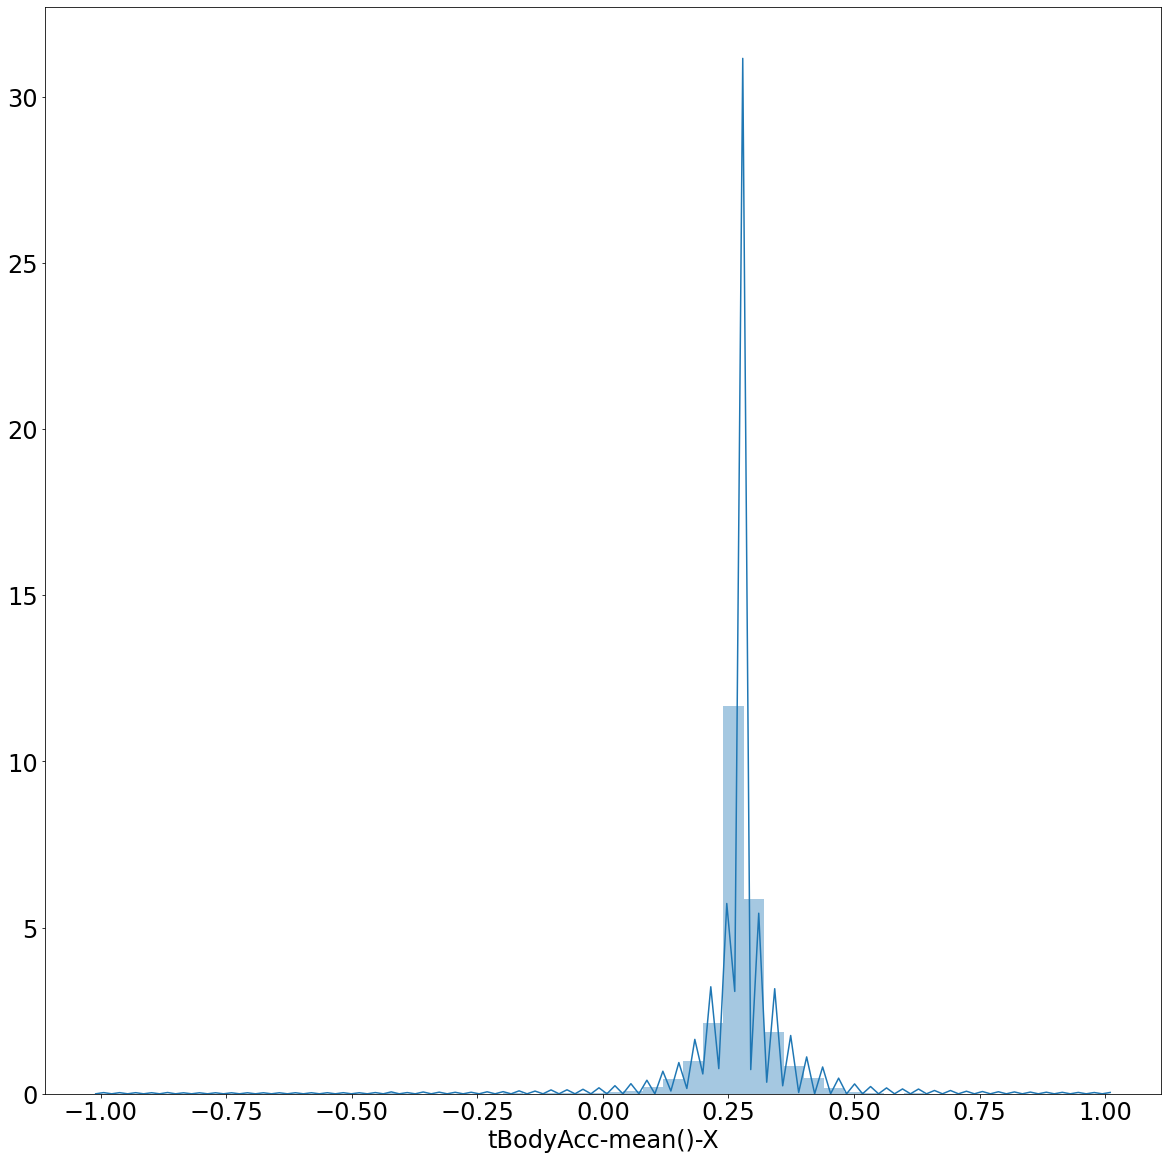

In [164]:
#Distrtibution plot of one of the mean vaiables 
sns.distplot(train_data['tBodyAcc-mean()-X']);

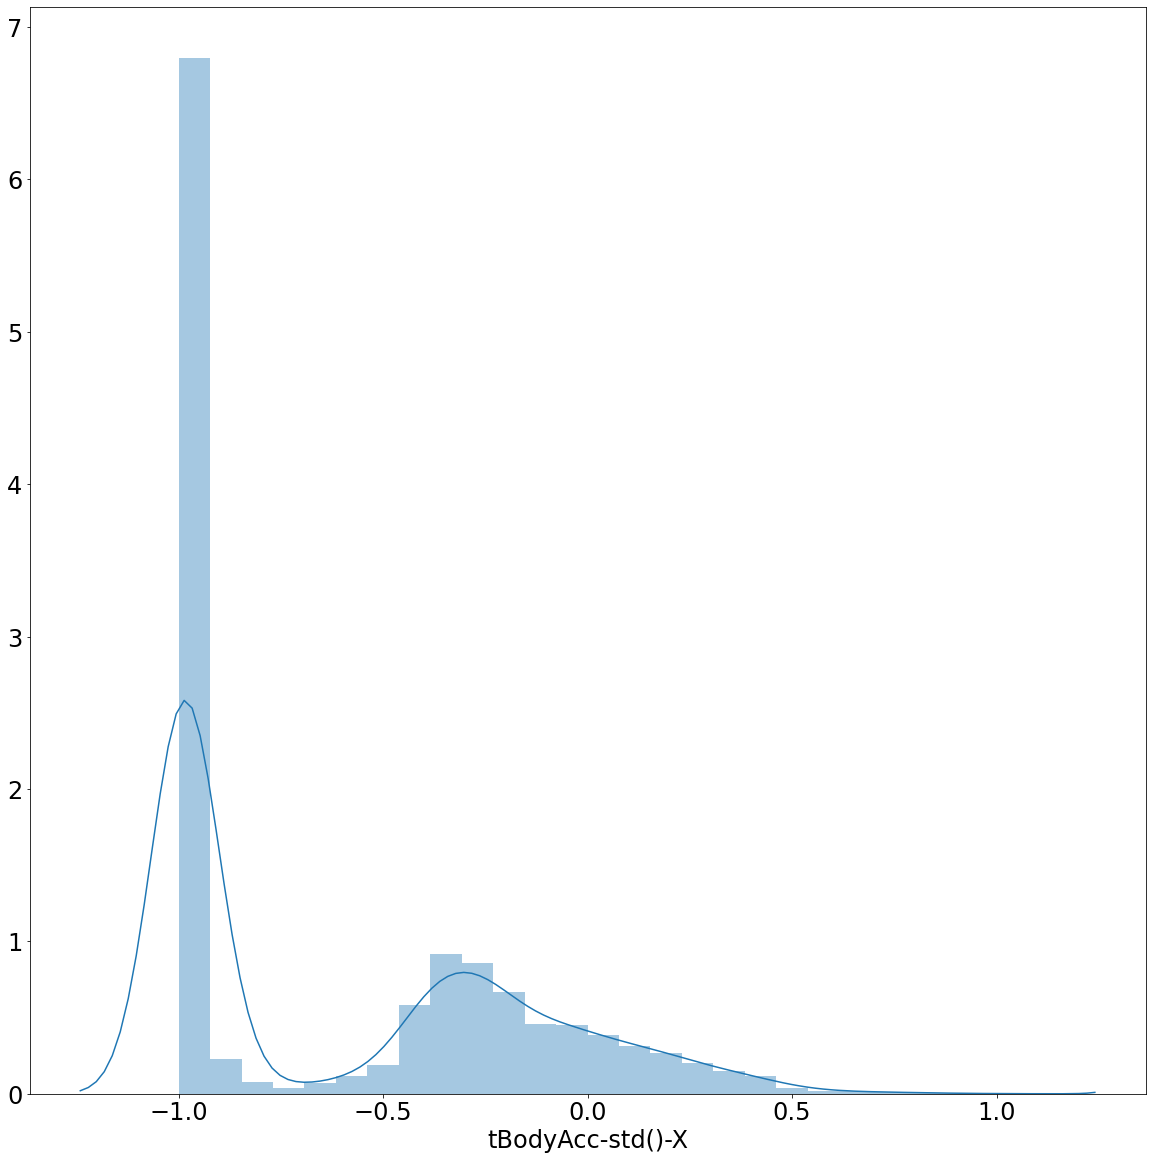

In [165]:
#distplot of one of the std variables
sns.distplot(train_data['tBodyAcc-std()-X'])

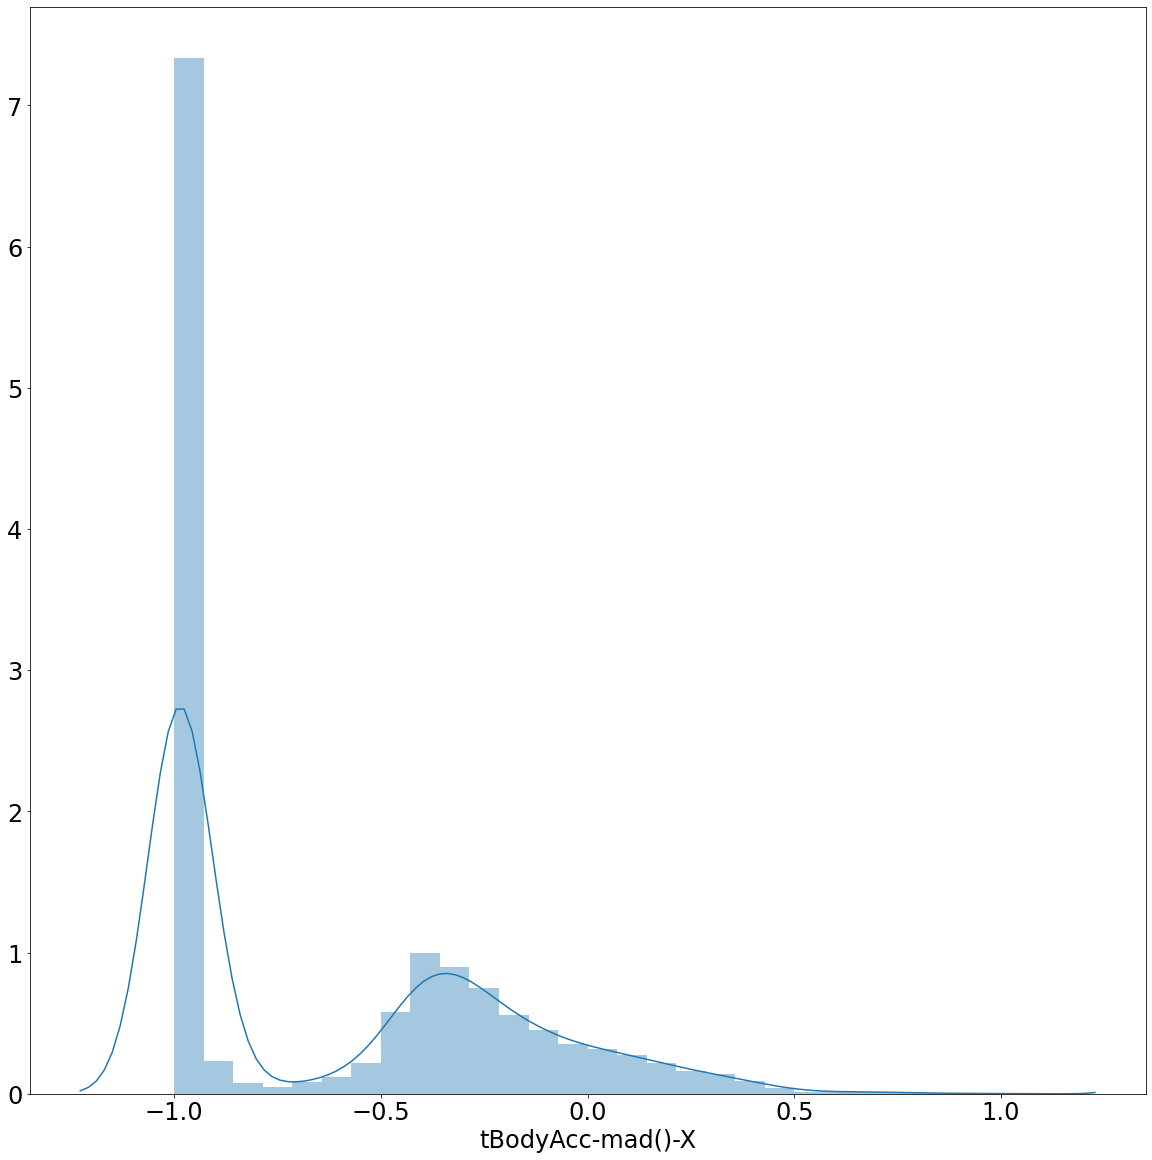

In [166]:
#distplot of one of the mode variables 
sns.distplot(train_data['tBodyAcc-mad()-X'])

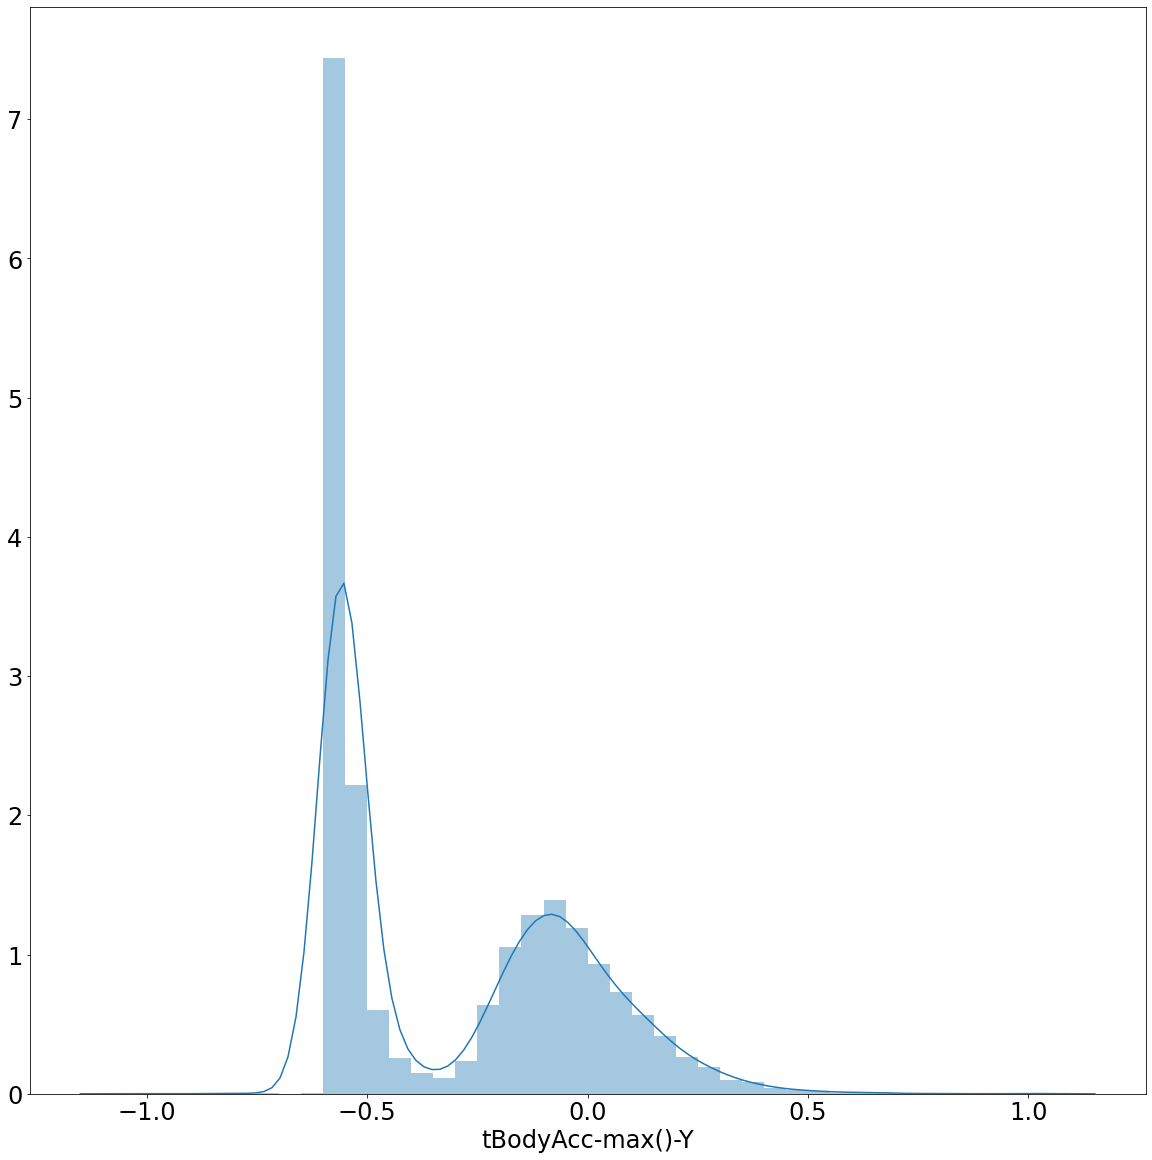

In [167]:
#distplot of one of the max variables
sns.distplot(train_data['tBodyAcc-max()-Y'])

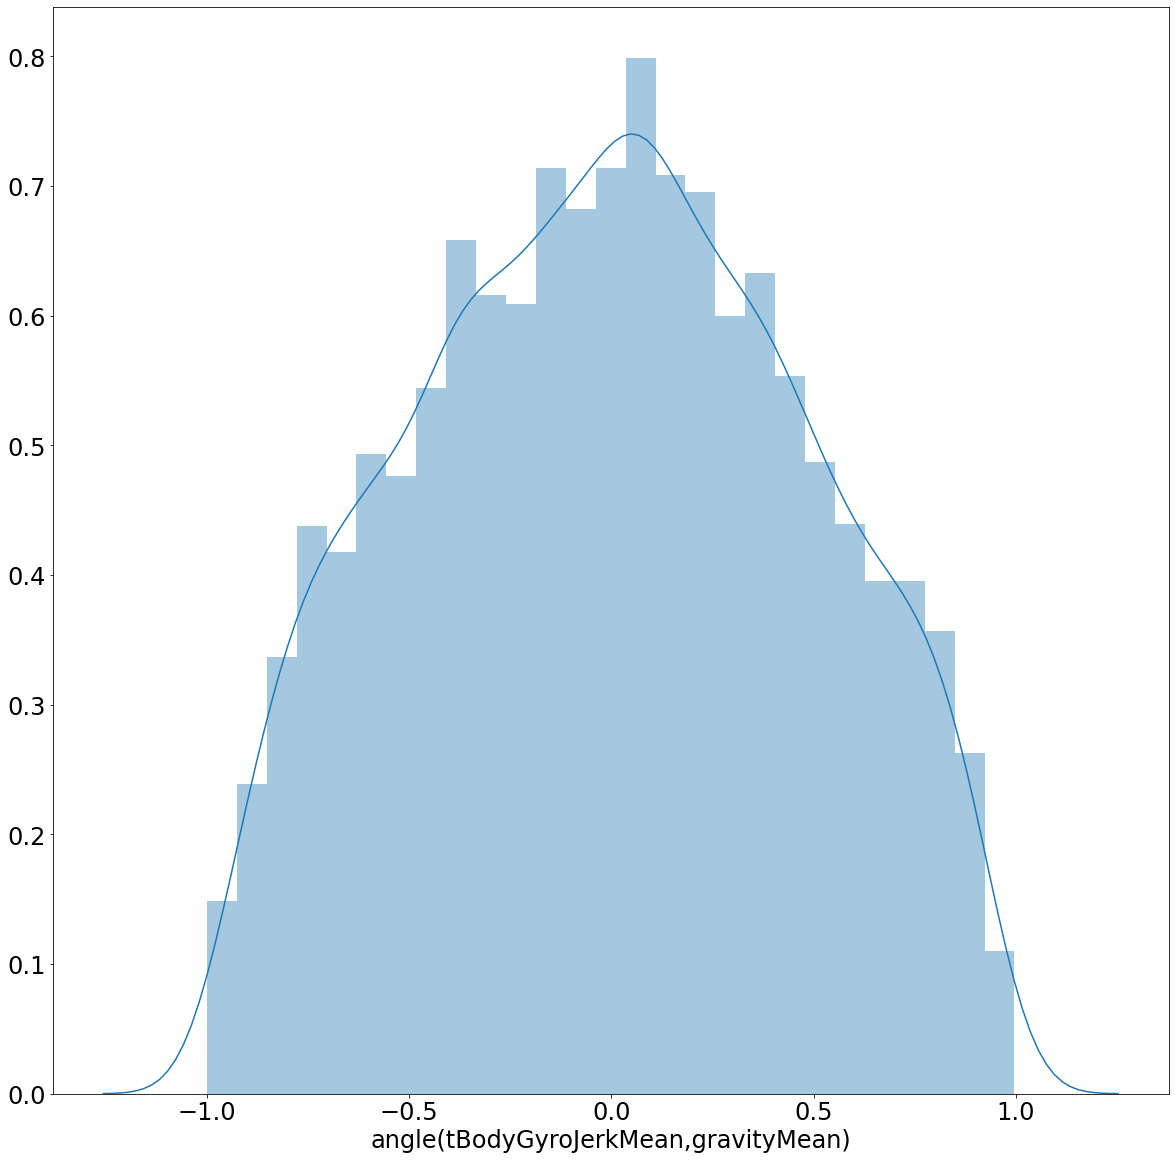

In [168]:
#distplot for one of the gyroscope varaible
sns.distplot(train_data['angle(tBodyGyroJerkMean,gravityMean)'])

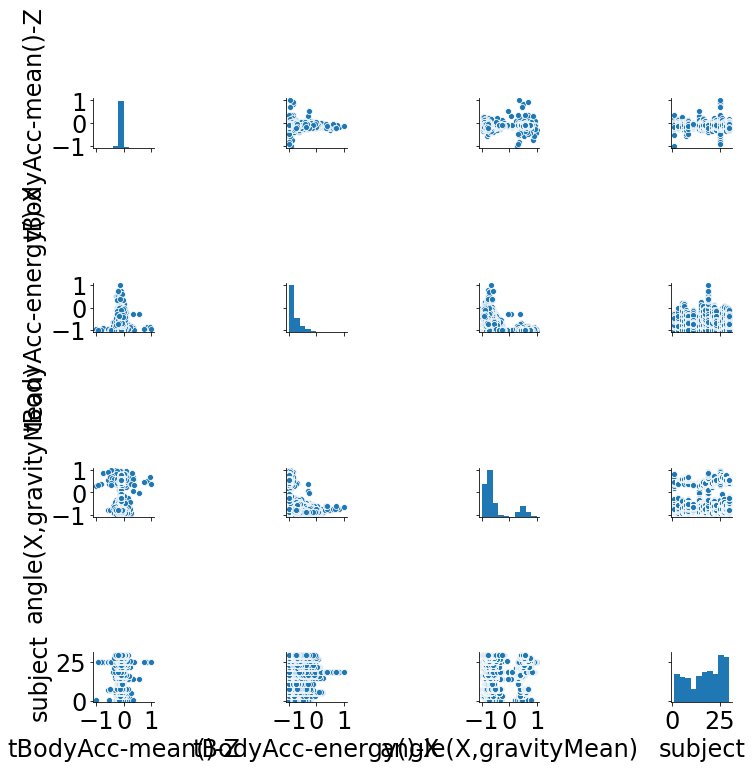

In [169]:
#pairplot of some of the variables along with activity and subject
sns.pairplot(train_data[['tBodyAcc-mean()-Z','tBodyAcc-energy()-X','angle(X,gravityMean)','subject',]])

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

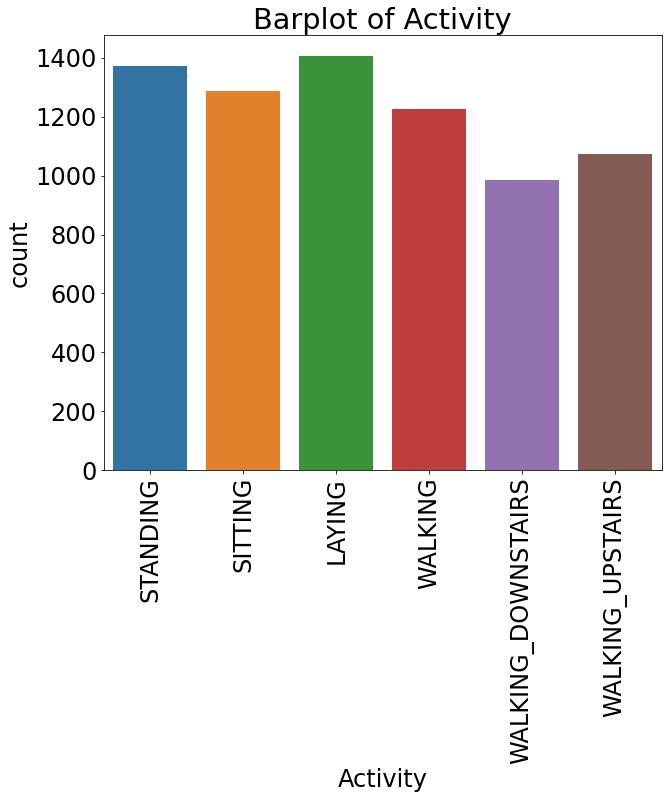

In [170]:
#checking if there is any imbalance data 
plt.figure(figsize=(10,8))
plt.title('Barplot of Activity')
sns.countplot(train_data.Activity)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

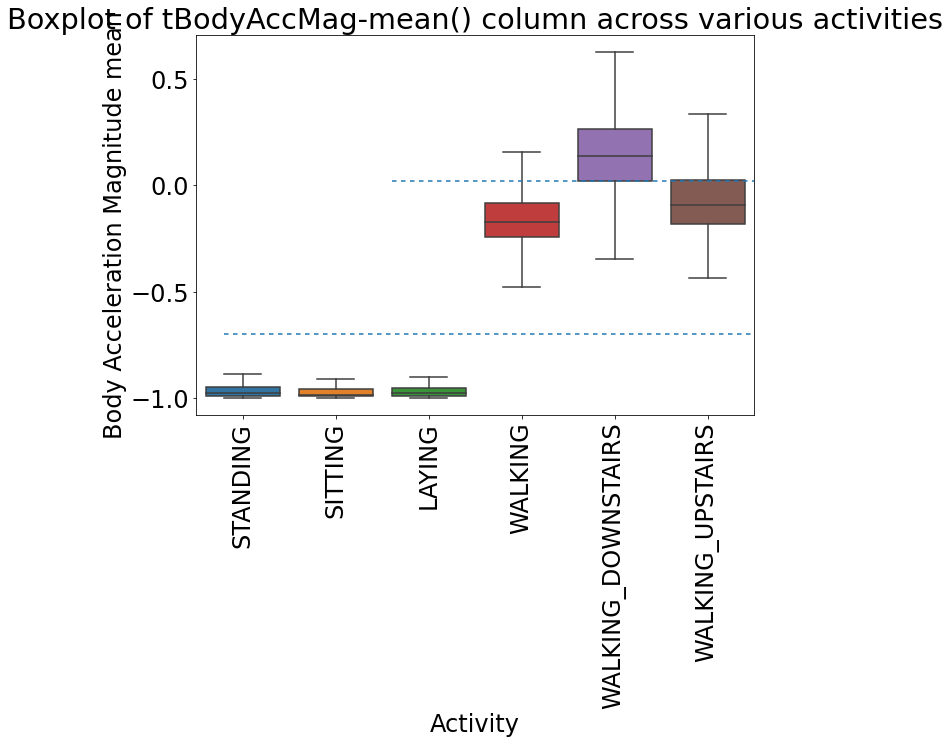

In [171]:
#The insights obtained through density plots can be represented using Box plots.
#Let's plot the boxplot of Body Accelartion Magnitude mean(tBodyAccMag-mean()) across all the six categories
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=train_data, showfliers=False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")
plt.axhline(y=-0.7, xmin=0.05,dashes=(3,3))
plt.axhline(y=0.020, xmin=0.35, dashes=(3,3))
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

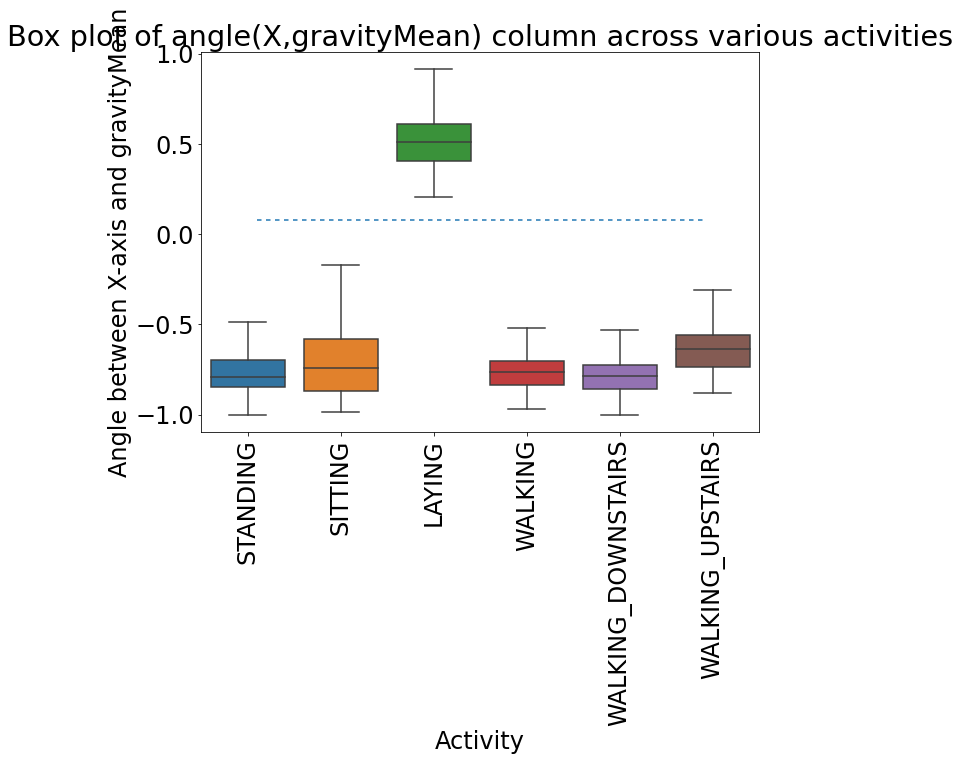

In [172]:
#From the boxplot we can observe that angle(X,gravityMean) perfectly seperates LAYING from other activities.
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train_data, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation = 90)

Using **t-SNE** data can be visualized from a extremely high dimensional space to a low dimensional space and still it retains lots of actual information. Given training data has 561 unqiue features, using t-SNE let's visualize it to a 2D space.

NOTE: t-Distributed Stochastic Neighbor Embedding is a non-linear dimensionality reduction algorithm used for exploring high-dimensional data.

In [0]:
from sklearn.manifold import TSNE

In [0]:
X_for_tsne = train_data.drop(['subject', 'Activity'], axis=1)

In [175]:
%time
tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(X_for_tsne)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10 µs
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.596s...
[t-SNE] Computed neighbors for 7352 samples in 47.426s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.123062
[t-SNE] KL divergence after 1000 iterations: 1.282848


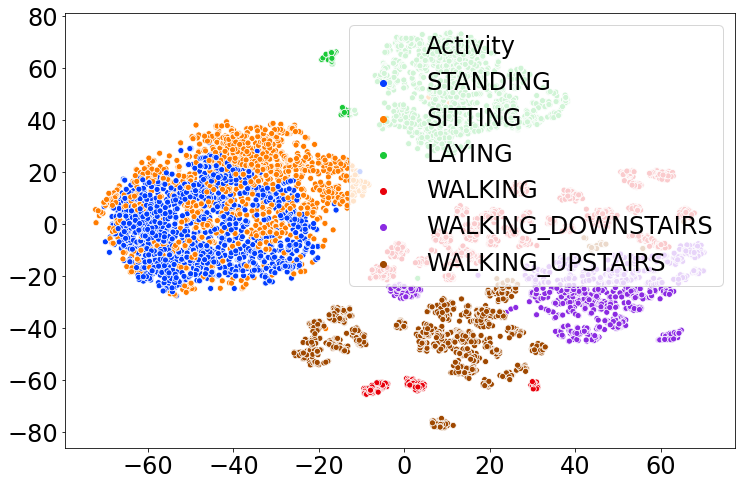

In [176]:
plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = train_data["Activity"],palette="bright")

## Visualizing the test dataset

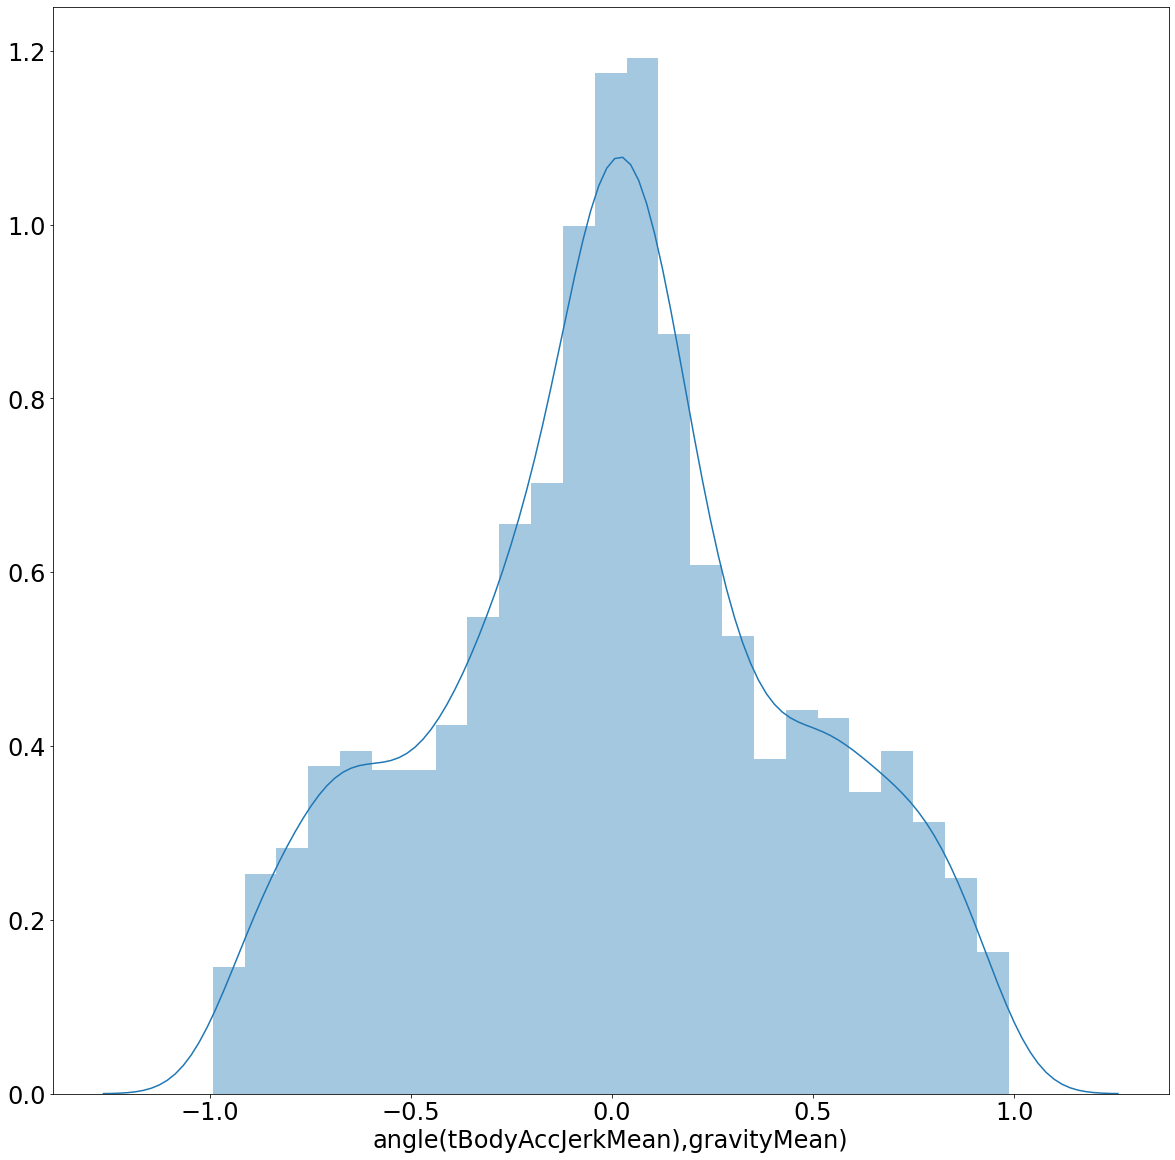

In [177]:
#distplot of some if the variables of mean,mode,std
sns.distplot(test_data['angle(tBodyAccJerkMean),gravityMean)'])

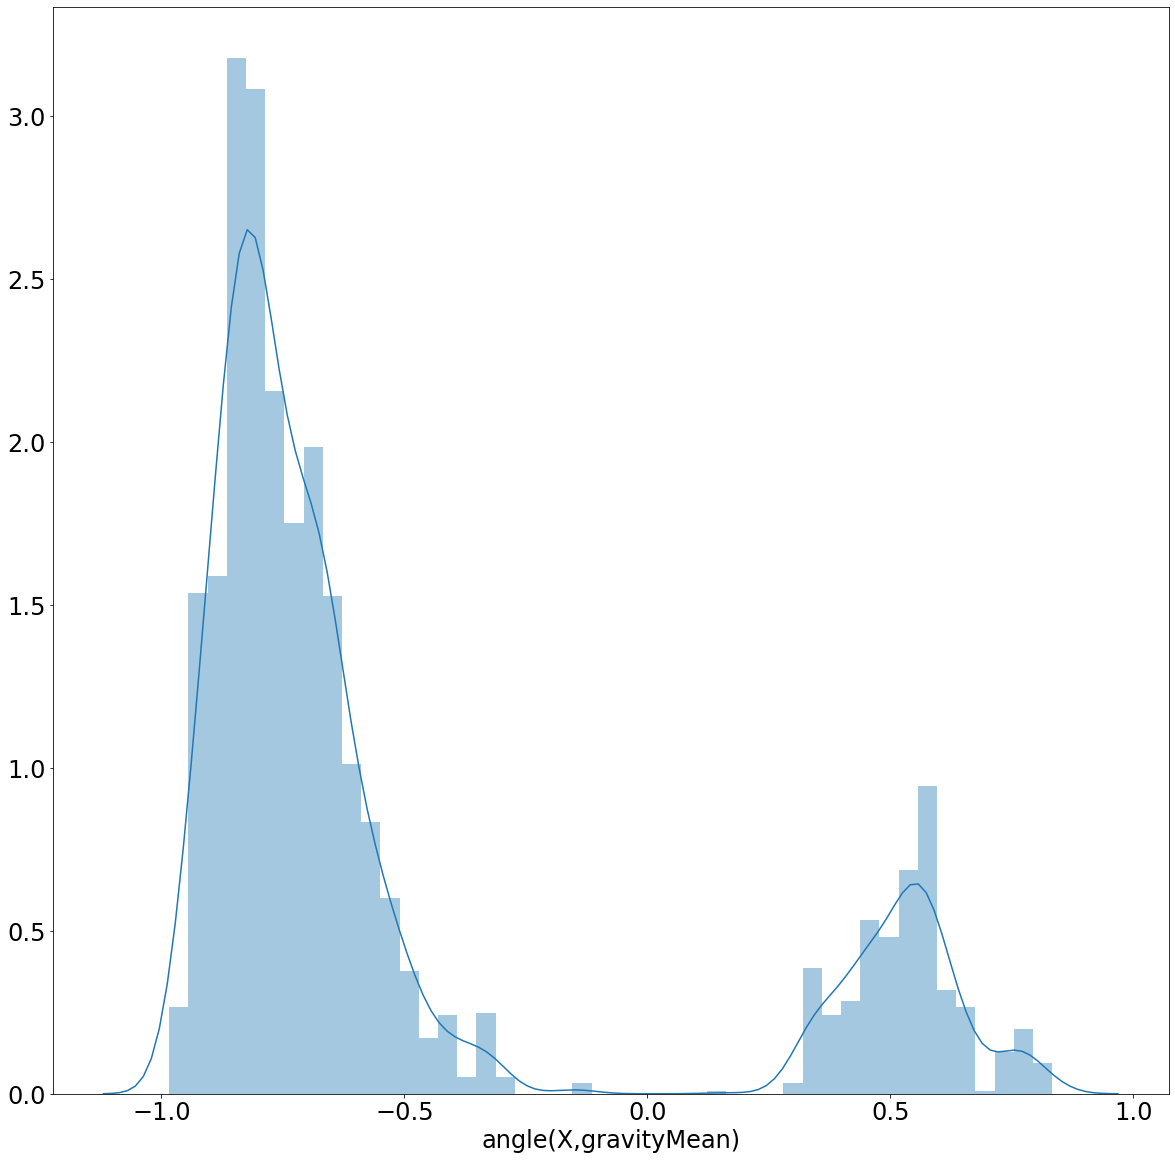

In [178]:
sns.distplot(test_data['angle(X,gravityMean)'])

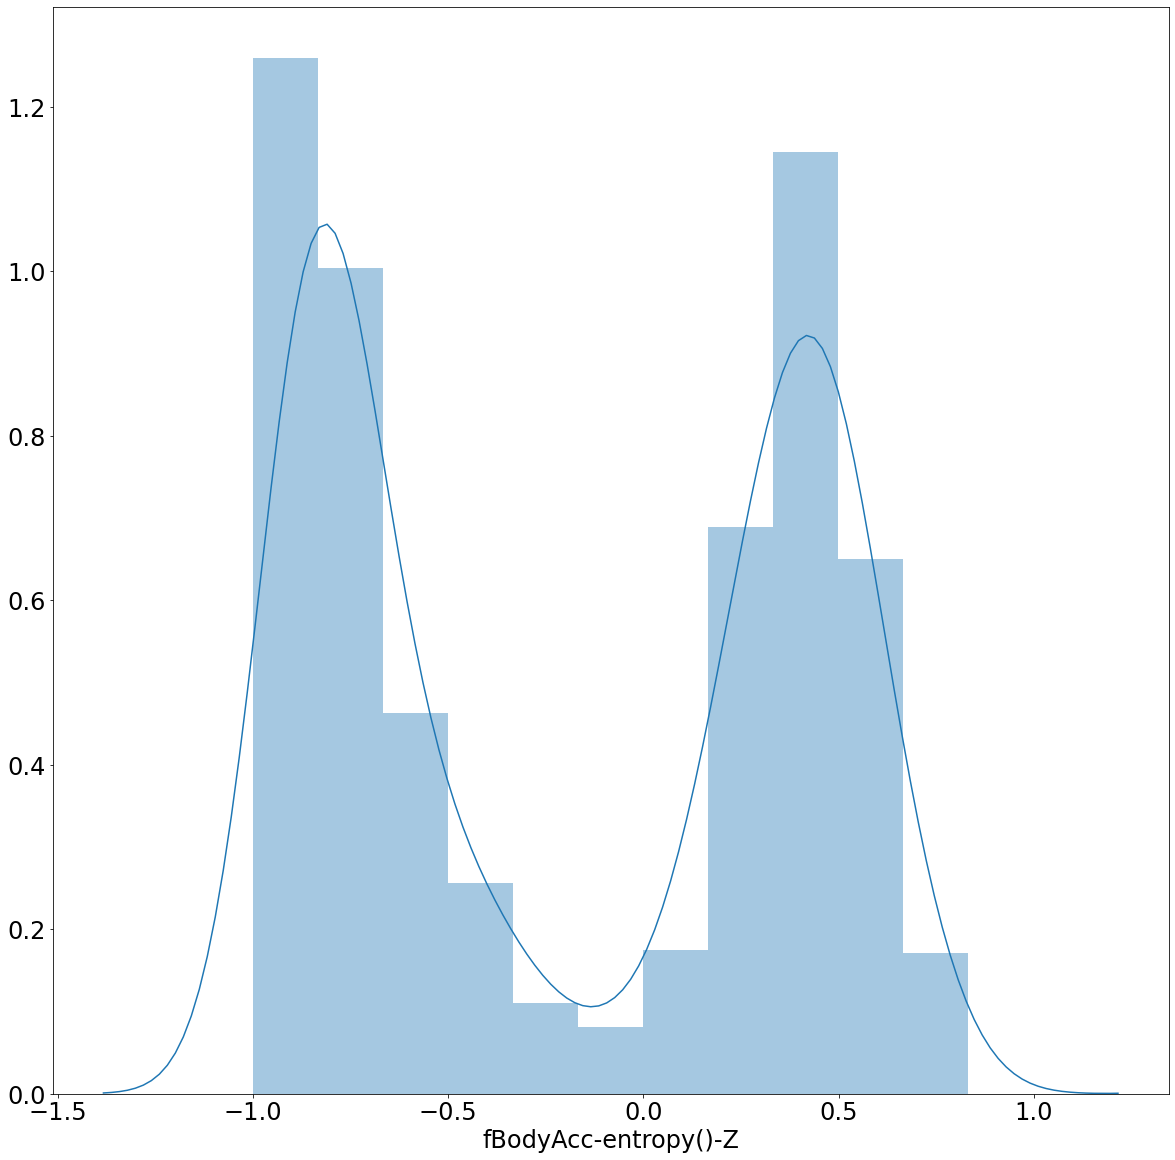

In [179]:
sns.distplot(test_data['fBodyAcc-entropy()-Z'])

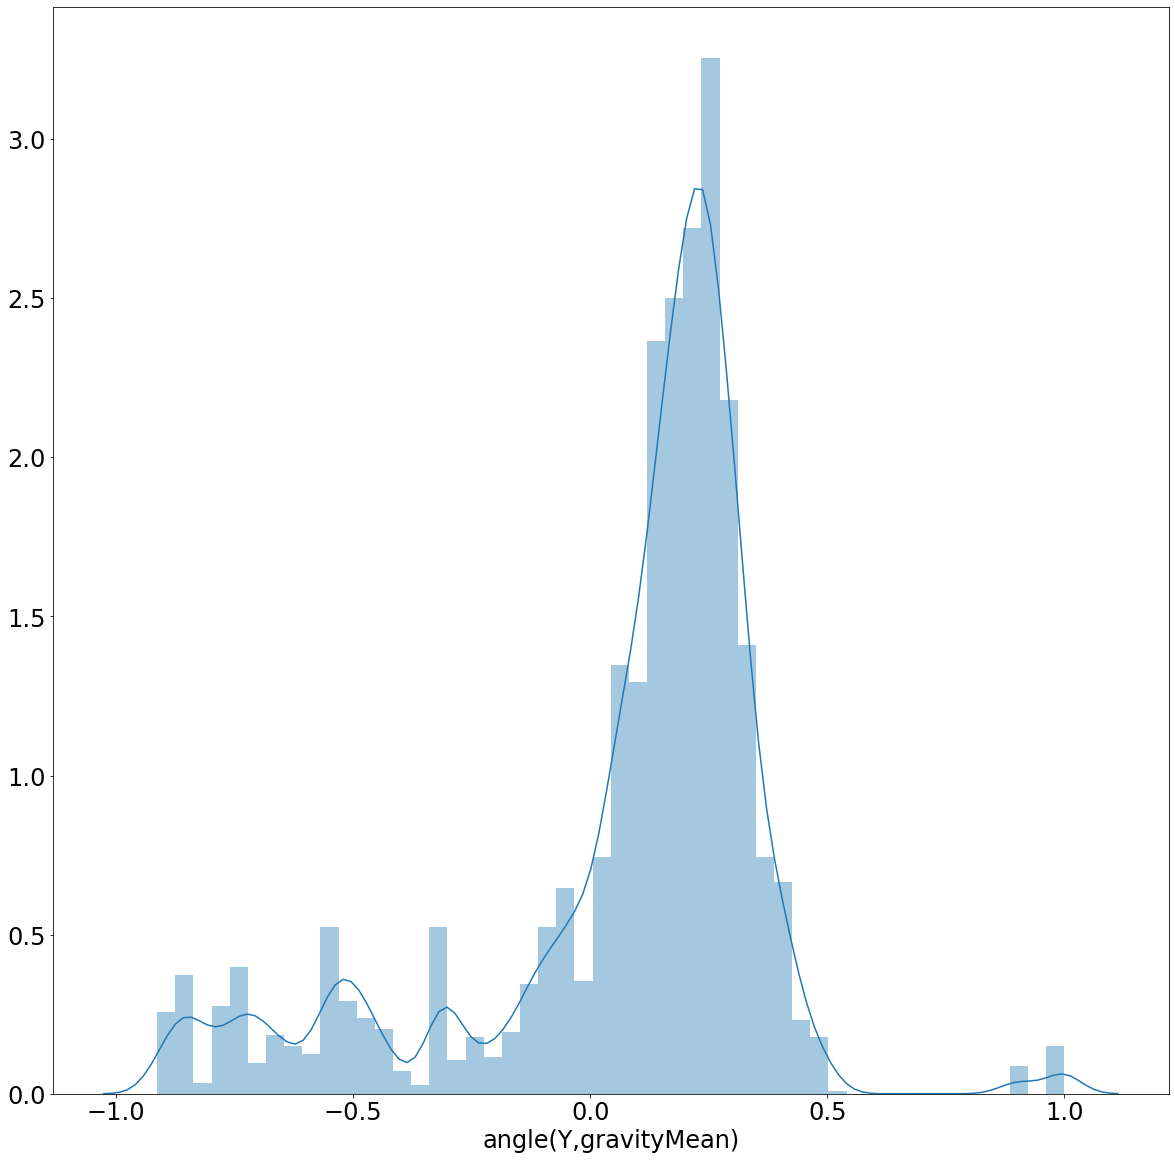

In [180]:
sns.distplot(test_data['angle(Y,gravityMean)'])

([<matplotlib.patches.Wedge at 0x7f31afd78278>,
 [Text(0.9071064061014833, 0.6222201925441275, 'LAYING'),
  Text(-0.23874635466468208, 1.073778458591122, 'SITTING'),
  Text(-1.0745883152841482, 0.2350743555872831, 'STANDING'),
  Text(-0.7193129027755119, -0.832219290752544, 'WALKING'),
  Text(0.29301586483507763, -1.0602554894717366, 'WALKING_DOWNSTAIRS'),
  Text(1.0038008332903794, -0.4498709671511826, 'WALKING_UPSTAIRS')],
 [Text(0.4947853124189908, 0.3393928322967968, '19.14'),
  Text(-0.13022528436255384, 0.5856973410497028, '18.69'),
  Text(-0.5861390810640807, 0.12822237577488166, '17.49'),
  Text(-0.3923524924230064, -0.453937794955933, '16.68'),
  Text(0.15982683536458778, -0.5783211760754926, '14.59'),
  Text(0.5475277272492978, -0.24538416390064502, '13.41')])

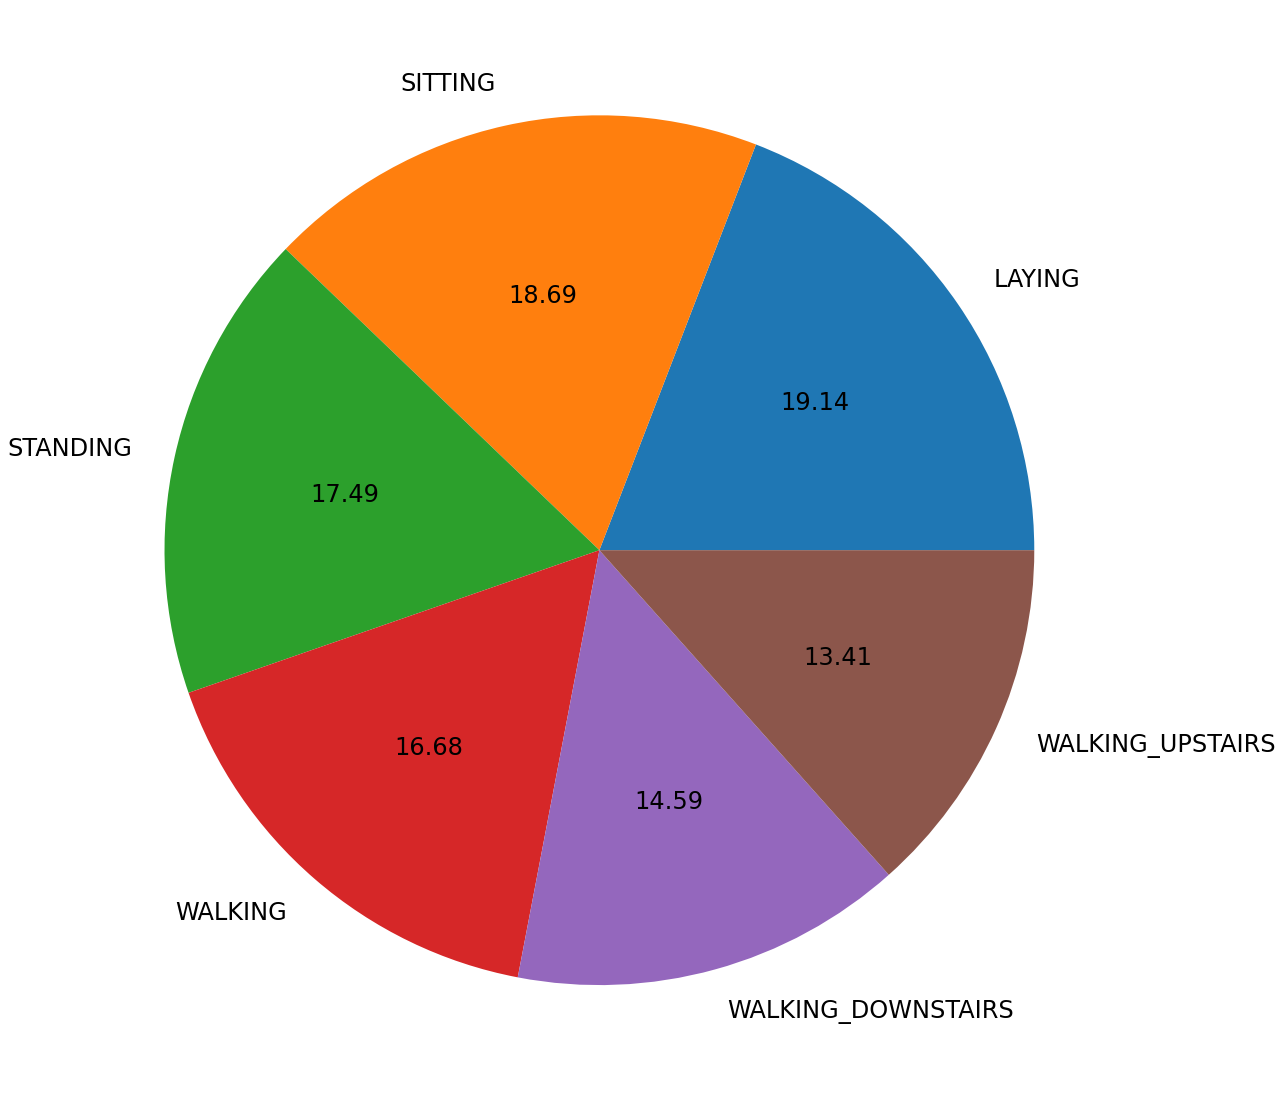

In [181]:
count_of_each_activity = np.array(train_data.Activity.value_counts())
activities = sorted(train_data.Activity.unique())


# Plot a pie chart for different activities
plt.rcParams.update({'figure.figsize': [20, 20], 'font.size': 24})
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')

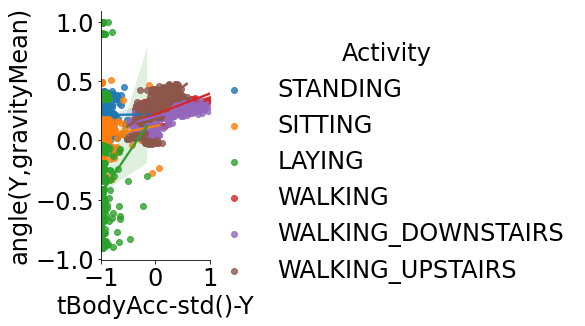

In [182]:
#lmplot() is one of the most widely used function to plot the Linear Relationship between 2 variables
sns.lmplot(y="angle(Y,gravityMean)", x="tBodyAcc-std()-Y",hue="Activity", data=test_data);

**POINT PLOT**:An alternative style for visualizing the same information is offered by the pointplot() function. This function also encodes the value of the estimate with height on the other axis, but rather than show a full bar it just plots the point estimate and confidence interval. Additionally, pointplot connects points from the same hue category. This makes it easy to see how the main relationship is changing as a function of a second variable, because your eyes are quite good at picking up on differences of slopes

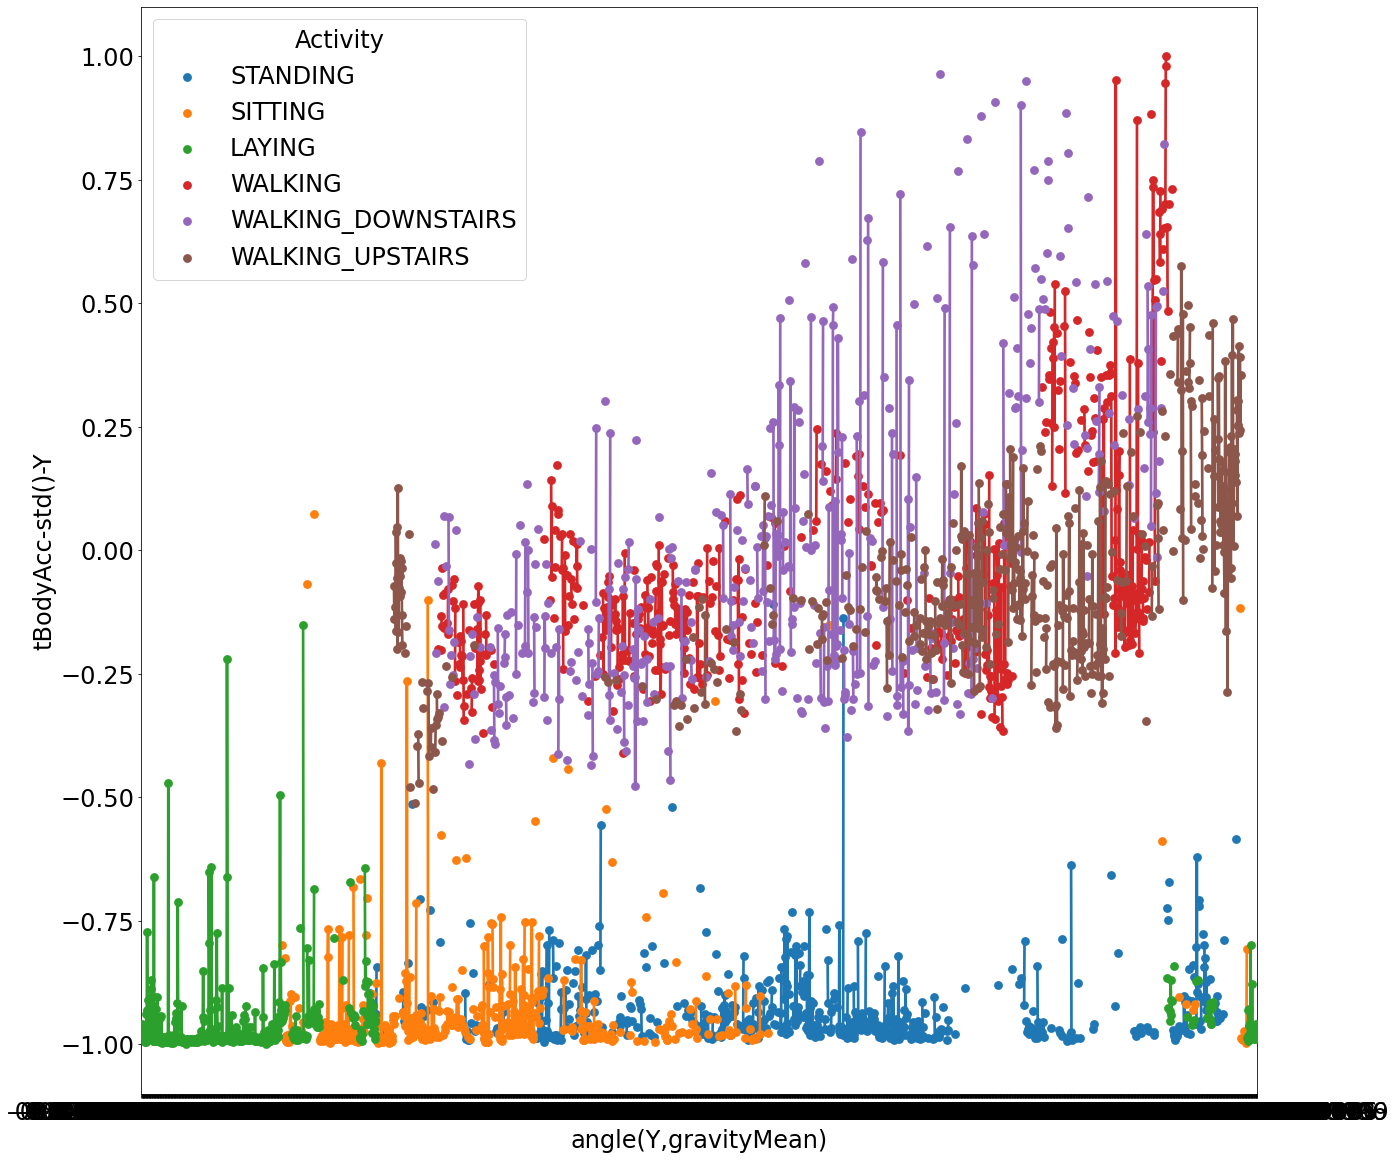

In [183]:
sns.pointplot(test_data['angle(Y,gravityMean)'], test_data['tBodyAcc-std()-Y'], hue=test_data['Activity']);

In [184]:
train_data.describe()
#we can observe 
# 1) that  the maximum value and the minimum values are 1.000000 and -1.000000 respectively
# 2) In most of the variables the mean and the mode are approximately equal which implies the data is normally distributed

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,-0.306043,-0.557121,0.523551,0.387386,0.594374,-0.547569,-0.820041,-0.901874,-0.845784,-0.684345,-0.643770,-0.631069,-0.102993,-0.137937,-0.163946,-0.116599,0.102762,-0.037786,0.130477,-0.026229,0.026322,0.159966,-0.019575,0.009420,0.033291,0.036587,-0.078640,-0.125131,-0.193802,0.105005,...,-0.678618,-0.347657,-0.877995,0.178195,-0.312968,-0.615441,-0.693210,-0.692876,-0.674830,-0.726645,-0.885103,-0.693210,-0.874292,-0.719795,-0.087878,-0.889442,-0.046516,-0.253649,-0.565425,-0.779376,-0.792391,-0.772836,-0.811409,-0.871927,-0.779376,-0.935785,-0.771497,-0.284627,-0.898859,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,0.282243,0.293867,0.363594,0.343611,0.297818,0.471808,0.259607,0.126333,0.221983,0.371608,0.371581,0.386569,0.468959,0.437268,0.371363,0.306507,0.246593,0.243635,0.230067,0.257383,0.215001,0.208837,0.221432,0.

In [185]:
test_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,-0.303028,-0.574975,0.529679,0.394903,0.607122,-0.563359,-0.838978,-0.904777,-0.876810,-0.701179,-0.642868,-0.664678,-0.093694,-0.105883,-0.142690,-0.124831,0.123073,-0.030495,0.100853,-0.038277,0.045200,0.143128,-0.014339,-0.002145,0.048802,0.029028,-0.092721,-0.108279,-0.207585,0.095198,...,-0.671666,-0.315550,-0.877314,0.160807,-0.262749,-0.567276,-0.707893,-0.717690,-0.696441,-0.754527,-0.897678,-0.707893,-0.898787,-0.727937,-0.047341,-0.880905,-0.029208,-0.290799,-0.601914,-0.780744,-0.791688,-0.774820,-0.806254,-0.869391,-0.780744,-0.943172,-0.775752,-0.248673,-0.902963,0.130236,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,0.274075,0.253431,0.338503,0.326645,0.271650,0.434127,0.211957,0.125120,0.157134,0.325979,0.362060,0.331992,0.445319,0.423831,0.359451,0.310705,0.247947,0.257935,0.235618,0.246854,0.209876,0.207973,0.217290,0

In [0]:
#Converting the Activity variable records from categorical to numerical using a temp variable in both test and train data
#Train data
temp_train = []
for i in train_data.Activity:
    if i == "WALKING": temp_train.append(0)
    if i == "WALKING_UPSTAIRS": temp_train.append(1)
    if i == "WALKING_DOWNSTAIRS": temp_train.append(2)
    if i == "SITTING": temp_train.append(3)
    if i == "STANDING": temp_train.append(4)
    if i == "LAYING": temp_train.append(5)
train_data["n_Activity"] = temp_train

#TEST data
temp_test = []
for i in test_data.Activity:
    if i == "WALKING": temp_test.append(0)
    if i == "WALKING_UPSTAIRS": temp_test.append(1)
    if i == "WALKING_DOWNSTAIRS": temp_test.append(2)
    if i == "SITTING": temp_test.append(3)
    if i == "STANDING": temp_test.append(4)
    if i == "LAYING": temp_test.append(5)
test_data["n_Activity"] = temp_test

In [0]:
#Dropping the Activity variable from both test and train datasets
test_data.drop(["Activity"] , axis = 1 , inplace = True)
train_data.drop(["Activity"] , axis = 1 , inplace = True)

In [188]:
train_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject',
       'n_Activity'],
      dtype='object', length=563)

In [189]:
test_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject',
       'n_Activity'],
      dtype='object', length=563)

In [190]:
#converting the datsets into X and y independent and dependent variables respectively
X_train = train_data.iloc[:,0:562]

X_test = test_data.iloc[:,0:562]

print(X_train.shape)
print(X_test.shape)

(7352, 562)
(2947, 562)


In [191]:
y_train=train_data['n_Activity']
y_test=test_data['n_Activity']

print(y_train.shape)
print(y_test.shape)

(7352,)
(2947,)


In [192]:
#Using StandaradScalar to transform the data such that it has mean as 0 and deviation as 1
# NOte: we can use MinMaxScalar as well
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(train_data)

scaled_train_data=scaler.transform(train_data)
scaled_train_data



array([[ 0.20064157, -0.0636826 , -0.41962845, ..., -0.00756789,
        -1.8288513 ,  0.77758394],
       [ 0.05594788,  0.03148567, -0.25390836, ...,  0.00787517,
        -1.8288513 ,  0.77758394],
       [ 0.07351535, -0.04341648, -0.07629468, ...,  0.02650234,
        -1.8288513 ,  0.77758394],
       ...,
       [-0.01566765,  0.0167814 ,  1.13222107, ...,  0.34870928,
         1.4025149 , -0.94192593],
       [ 0.21586648, -0.02812252, -0.86770988, ...,  0.29327564,
         1.4025149 , -0.94192593],
       [ 1.09620157,  0.12919873, -1.67268082, ...,  0.33396081,
         1.4025149 , -0.94192593]])

In [0]:
#Doing Principle composite analysis(PCA) to reduce to the dimensionality which inturn helps in avoiding overfitting
from sklearn.decomposition import PCA
p_c_a= PCA(n_components=200)
p_c_a.fit(scaled_train_data)


x_pca=p_c_a.transform(scaled_train_data)

In [194]:
print(scaled_train_data.shape)
print(x_pca.shape)

(7352, 563)
(7352, 200)


## Applying the various machine learning algorithms and find out which one gives out more accurate results

In [0]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier


In [196]:
#Logistic regression
clf = LogisticRegression().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_score(y_test, prediction)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_score(y_test, prediction)*100))

Logistic Regression accuracy: 95.24940617577197%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [197]:
# Support Vector Classifier

clf = SVC().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_score(y_test, prediction)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_score(y_test, prediction)*100))

Support Vector Classifier accuracy: 93.07770614183916%


In [198]:
# K Nearest Neighbors
clf = KNeighborsClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_score(y_test, prediction)*100))

K Nearest Neighbors Classifier accuracy: 80.79402782490669%


In [199]:
# Random Forest
clf = RandomForestClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_score(y_test, prediction)*100))


Random Forest Classifier accuracy: 92.46691550729555%


In [200]:
#XGBoost
model = XGBClassifier(n_jobs=2) # using two processors 
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=2,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [201]:
y_pred = model.predict(X_test)
y_pred_prop = model.predict_proba(X_test)
#predictions = [round(value) for value in y_pred_prop]
predictions=y_pred.copy()
print(predictions)

[4 4 4 ... 1 1 1]


In [202]:
accuracy_score(y_test, y_pred)

0.9389209365456397

In [203]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt=dt_model.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.8506956226671191

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [205]:

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim =50 , init = 'he_uniform',activation='relu',input_dim = 562))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=562, units=50, kernel_initializer="he_uniform")`
  


In [206]:
# Adding the second hidden layer
classifier.add(Dense(output_dim = 55, init = 'he_uniform',activation='relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=55, kernel_initializer="he_uniform")`
  


In [207]:
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  


In [0]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [209]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Train on 4925 samples, validate on 2427 samples
Epoch 1/100
4925/4925 [==============================] - 1s 208us/step - loss: -19314.1167 - accuracy: 0.1446 - val_loss: -74835.2333 - val_accuracy: 0.1492
Epoch 2/100
4925/4925 [==============================] - 1s 185us/step - loss: -249177.9164 - accuracy: 0.1444 - val_loss: -523786.7742 - val_accuracy: 0.1492
Epoch 3/100
4925/4925 [==============================] - 1s 187us/step - loss: -992523.6271 - accuracy: 0.1444 - val_loss: -1707870.7888 - val_accuracy: 0.1492
Epoch 4/100
4925/4925 [==============================] - 1s 186us/step - loss: -2626474.5665 - accuracy: 0.1444 - val_loss: -4002255.8725 - val_accuracy: 0.1492
Epoch 5/100
4925/4925 [==============================] - 1s 186us/step - loss: -5552632.2270 - accuracy: 0.1444 - val_loss: -7804590.2827 - val_accuracy: 0.1492
Epoch 6/100
4925/4925 [==============================] - 1s 190us/step - loss: -10075913.4909 - accuracy: 0.1444 - val_loss: -13508234.4574 - val_accuracy

In [0]:
#Hyper parameter tuning for knowing what exact number of input neurons and output neurons gives max accuracy
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid



def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units =6 , kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)


layers = [(20,), (40, 20), (45, 30, 15)]
activations = ['sigmoid', 'relu']
param_grids = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grids,cv=5)

In [225]:
grid_result=grid.fit(X_train, y_train)
[grid_result.best_score_,grid_result.best_params_]

[0.916627311706543,
 {'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': (20,)}]

We can clearly see that after hyper parameter tuning the model is accurate at 
 {'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': (20,)}]